In [15]:
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

import cv2

<b>Funktion für die Darstellung von Bildern mit 'cv2.imshow'</b><br>

In [16]:
'''
show images with cv2.imshow:
:input img: image file
:input scale_percent: percentage input of the image size
:input figure_name: name of the figure
'''
def ShowImage(img, scale_percent, figure_name):
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imshow(figure_name, resized)

<b>Bilddaten laden</b><br>

In [17]:
imgData = glob('../../../pics/images_bv_kaschuba/hough_transformation/*.*')

In [18]:
imgData

['../../../pics/images_bv_kaschuba/hough_transformation/xRaps.bmp',
 '../../../pics/images_bv_kaschuba/hough_transformation/hsbi_gebaeude.jpg',
 '../../../pics/images_bv_kaschuba/hough_transformation/schueco_sonnenschutz.bmp',
 '../../../pics/images_bv_kaschuba/hough_transformation/x_schrauben.bmp']

<b>Bilddaten einlesen (xRaps.bmp) - 'cv2.imread'</b><br>

In [19]:
image = cv2.imread(imgData[0])

<b>Konvertierung von BGR zu RGB - 'cv2.cvtColor(image, cv2.COLOR_BGR2RGB)' und von BGR zu GRAY 'cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)'</b><br>

In [20]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<b>Biddatein darstellen/anzeigen</b><br>

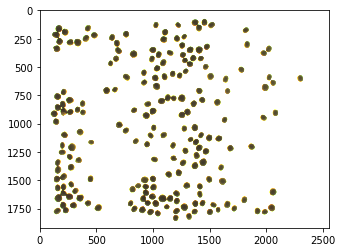

In [21]:
# image_rgb anzeigen: plt.imshow
plt.imshow(image_rgb)

# Alternative show image_gray: cv2.imshow
#ShowImage(image_gray, 50, 'image_rgb')
#cv2.waitKey(0)
#cv2.destroyWindow('image_rgb')

<b>Kantendetektor 'cv2.Canny' und Kantenbild anzeigen</b><br>

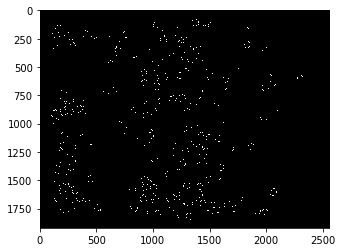

In [22]:
edges = cv2.Canny(image_gray,50,100)
plt.imshow(edges, cmap='gray')
#ShowImage(edges, 50, 'edges canny')
#cv2.waitKey(0)
#cv2.destroyWindow('edges canny')

<b>HoughCircles mit 'cv2.HoughCircles' berechnen</b><br> 

In [23]:
'''
HoughCircles:
input - gray: Input image (grayscale).
input - HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV.
input - dp = 1: The inverse ratio of resolution.
input - minDist = Minimum distance between detected centers.
input - param1: Upper threshold for the internal Canny edge detector. it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
input - param2: Threshold for center detection.
input - minRadius = 0: Minimum radius to be detected. If unknown, put zero as default.
input - maxRadius = 0: Maximum radius to be detected. If unknown, put zero as default.
output - circles: A vector that stores sets of 3 values: xc,yc,r for each detected circle.
'''
circles = cv2.HoughCircles(image_gray,cv2.HOUGH_GRADIENT,dp=1,minDist=20,param1=100,param2=25,minRadius=20,maxRadius=50)

<b>Kreise zeichnen und anzeigen</b><br>

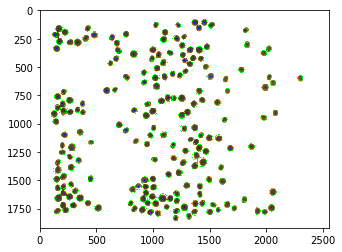

In [25]:
circles = np.uint16(np.around(circles))
image_HoughCircles = np.copy(image_rgb)
for i in circles[0,:]:
    # outer circle
    cv2.circle(image_HoughCircles,(i[0],i[1]),i[2],(0,255,0),2)
    # center of the circle
    cv2.circle(image_HoughCircles,(i[0],i[1]),2,(0,0,255),3)
 

# image_rgb anzeigen: plt.imshow
plt.imshow(image_HoughCircles)
 
#ShowImage(image_HoughCircles, 40, 'detected circles')
#cv2.waitKey(0)
#cv2.destroyWindow('detected circles')